# # Bean Pest Management Knowledge Base System
# 
# **Formal KR&R Implementation of Prolog Pest Management Rules**

# ## 1. Formal Ontology Definition

In [2]:
import pandas as pd
from dataclasses import dataclass
from typing import List, Dict, Set, Optional, Tuple
from enum import Enum
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
class Severity(Enum):
    LOW = "Low"
    MODERATE = "Moderate" 
    HIGH = "High"

class RiskLevel(Enum):
    LOW = "Low"
    MODERATE = "Moderate"
    HIGH = "High"

class ControlType(Enum):
    CHEMICAL = "Chemical"
    BIOLOGICAL = "Biological"
    BOTANICAL = "Botanical"
    CULTURAL = "Cultural"

# %%
@dataclass
class Pest:
    name: str
    severity: Severity
    symptoms: List[str]
    description: str
    
    def __hash__(self):
        return hash(self.name)

@dataclass
class Pesticide:
    name: str
    control_type: ControlType
    target_pests: List[str]
    pre_harvest_interval: int  # days
    risk_level: RiskLevel
    description: str
    
    def __hash__(self):
        return hash(self.name)

# ## 2. Knowledge Base Implementation

In [4]:
class BeanPestKnowledgeBase:
    def __init__(self):
        self.pests = {}
        self.pesticides = {}
        self.symptoms_to_pests = {}
        self.semantic_network = nx.MultiDiGraph()
        self._initialize_knowledge_base()
    
    def _initialize_knowledge_base(self):
        self._initialize_pests()
        self._initialize_pesticides()
        self._build_symptom_mapping()
        self._build_semantic_network()
    
    def _initialize_pests(self):
        """Initialize all bean pests from Prolog facts"""
        self.pests = {
            "black_bean_aphid": Pest(
                name="Black Bean Aphid",
                severity=Severity.MODERATE,
                symptoms=["leaf_curling", "yellowing", "sticky_honeydew"],
                description="Sap-sucking insects that cause leaf distortion and honeydew"
            ),
            "bean_fly": Pest(
                name="Bean Fly",
                severity=Severity.HIGH,
                symptoms=["stem_swelling", "wilting", "seedling_death"],
                description="Fly larvae that tunnel into stems causing plant death"
            ),
            "bean_leaf_beetle": Pest(
                name="Bean Leaf Beetle", 
                severity=Severity.MODERATE,
                symptoms=["leaf_holes", "defoliation"],
                description="Beetles that chew irregular holes in leaves"
            ),
            "whitefly": Pest(
                name="Whitefly",
                severity=Severity.MODERATE, 
                symptoms=["sooty_mould", "leaf_yellowing"],
                description="Small white flies that cause sooty mold growth"
            ),
            "root_knot_nematode": Pest(
                name="Root Knot Nematode",
                severity=Severity.HIGH,
                symptoms=["root_galls", "stunted_growth", "nutrient_deficiency"],
                description="Microscopic worms that cause root galls and stunting"
            ),
            "cutworm": Pest(
                name="Cutworm",
                severity=Severity.HIGH,
                symptoms=["cut_seedlings", "stem_cutting"],
                description="Nocturnal caterpillars that cut seedlings at base"
            ),
            "thrips": Pest(
                name="Thrips",
                severity=Severity.MODERATE,
                symptoms=["silvering_of_leaves", "flower_deformation"],
                description="Tiny insects that rasp plant surfaces causing silvering"
            ),
            "armyworm": Pest(
                name="Armyworm",
                severity=Severity.HIGH, 
                symptoms=["defoliation", "skeletonized_leaves"],
                description="Caterpillars that consume leaves rapidly in groups"
            ),
            "spider_mite": Pest(
                name="Spider Mite",
                severity=Severity.MODERATE,
                symptoms=["leaf_stippling", "webbing"],
                description="Microscopic mites that cause stippling and webbing"
            ),
            "fall_armyworm": Pest(
                name="Fall Armyworm",
                severity=Severity.HIGH,
                symptoms=["leaf_tunnels", "ragged_leaves"],
                description="Highly destructive caterpillars that tunnel in leaves"
            )
        }
    
    def _initialize_pesticides(self):
        """Initialize all pesticides from Prolog facts"""
        self.pesticides = {
            "imidacloprid": Pesticide(
                name="Imidacloprid",
                control_type=ControlType.CHEMICAL,
                target_pests=["black_bean_aphid", "whitefly"],
                pre_harvest_interval=14,
                risk_level=RiskLevel.MODERATE,
                description="Systemic neonicotinoid insecticide"
            ),
            "cypermethrin": Pesticide(
                name="Cypermethrin",
                control_type=ControlType.CHEMICAL, 
                target_pests=["bean_leaf_beetle", "cutworm"],
                pre_harvest_interval=7,
                risk_level=RiskLevel.MODERATE,
                description="Pyrethroid insecticide with contact action"
            ),
            "lambda_cyhalothrin": Pesticide(
                name="Lambda-cyhalothrin",
                control_type=ControlType.CHEMICAL,
                target_pests=["armyworm", "fall_armyworm"],
                pre_harvest_interval=14,
                risk_level=RiskLevel.MODERATE,
                description="Broad-spectrum pyrethroid insecticide"
            ),
            "abamectin": Pesticide(
                name="Abamectin",
                control_type=ControlType.CHEMICAL,
                target_pests=["spider_mite", "thrips"],
                pre_harvest_interval=10,
                risk_level=RiskLevel.MODERATE,
                description="Miticide and insecticide derived from soil bacteria"
            ),
            "chlorpyrifos": Pesticide(
                name="Chlorpyrifos",
                control_type=ControlType.CHEMICAL,
                target_pests=["bean_fly", "cutworm"],
                pre_harvest_interval=21,
                risk_level=RiskLevel.HIGH,
                description="Organophosphate insecticide - high environmental risk"
            ),
            "biopesticide_bt": Pesticide(
                name="Biopesticide Bt",
                control_type=ControlType.BIOLOGICAL,
                target_pests=["armyworm", "fall_armyworm"],
                pre_harvest_interval=0,
                risk_level=RiskLevel.LOW,
                description="Bacillus thuringiensis-based biological insecticide"
            ),
            "neem_oil": Pesticide(
                name="Neem Oil",
                control_type=ControlType.BOTANICAL,
                target_pests=["thrips", "black_bean_aphid"],
                pre_harvest_interval=0,
                risk_level=RiskLevel.LOW,
                description="Botanical insecticide from neem tree seeds"
            ),
            "spinosad": Pesticide(
                name="Spinosad",
                control_type=ControlType.BIOLOGICAL,
                target_pests=["bean_leaf_beetle", "armyworm"],
                pre_harvest_interval=7,
                risk_level=RiskLevel.LOW,
                description="Biological insecticide from soil bacteria"
            ),
            "acetamiprid": Pesticide(
                name="Acetamiprid",
                control_type=ControlType.CHEMICAL,
                target_pests=[],
                pre_harvest_interval=7,
                risk_level=RiskLevel.MODERATE,
                description="Neonicotinoid insecticide"
            ),
            "copper_oxychloride": Pesticide(
                name="Copper Oxychloride",
                control_type=ControlType.CHEMICAL,
                target_pests=[],
                pre_harvest_interval=10,
                risk_level=RiskLevel.LOW,
                description="Copper-based fungicide"
            )
        }
    
    def _build_symptom_mapping(self):
        """Build mapping from symptoms to pests for efficient diagnosis"""
        self.symptoms_to_pests = {}
        for pest_id, pest in self.pests.items():
            for symptom in pest.symptoms:
                if symptom not in self.symptoms_to_pests:
                    self.symptoms_to_pests[symptom] = []
                self.symptoms_to_pests[symptom].append(pest_id)
    
    def _build_semantic_network(self):
        """Build semantic network showing pest-pesticide relationships"""
        # Add pest nodes
        for pest_id, pest in self.pests.items():
            self.semantic_network.add_node(pest_id, type='pest', label=pest.name, severity=pest.severity.value)
        
        # Add pesticide nodes  
        for pesticide_id, pesticide in self.pesticides.items():
            self.semantic_network.add_node(pesticide_id, type='pesticide', label=pesticide.name, risk=pesticide.risk_level.value)
        
        # Add control relationships
        for pesticide_id, pesticide in self.pesticides.items():
            for target_pest in pesticide.target_pests:
                self.semantic_network.add_edge(
                    pesticide_id, target_pest,
                    relationship='controls',
                    phi=pesticide.pre_harvest_interval
                )


# ## 3. First-Order Logic Rules Implementation

In [5]:
class BeanPestLogic:
    def __init__(self, knowledge_base):
        self.kb = knowledge_base
    
    # FOL Rule 1: ∀symptom ∃pest (Causes(pest, symptom) → PossiblePest(pest))
    def diagnose_from_symptoms(self, symptoms: List[str]) -> Dict[str, float]:
        """Diagnose pests based on observed symptoms"""
        pest_scores = {}
        
        for symptom in symptoms:
            if symptom in self.kb.symptoms_to_pests:
                for pest_id in self.kb.symptoms_to_pests[symptom]:
                    if pest_id not in pest_scores:
                        pest_scores[pest_id] = 0
                    pest_scores[pest_id] += 1
        
        # Convert to confidence scores (0-1)
        for pest_id in pest_scores:
            total_symptoms = len(self.kb.pests[pest_id].symptoms)
            pest_scores[pest_id] = pest_scores[pest_id] / total_symptoms
        
        return pest_scores
    
    # FOL Rule 2: ∀pest ∀pesticide (Controls(pesticide, pest) ∧ LowRisk(pesticide) → RecommendedFirst(pesticide))
    def recommend_safe_controls(self, pest_id: str) -> List[Dict]:
        """Recommend safe, low-risk controls first"""
        recommendations = []
        
        for pesticide_id, pesticide in self.kb.pesticides.items():
            if pest_id in pesticide.target_pests:
                risk_factor = 0
                if pesticide.risk_level == RiskLevel.LOW:
                    risk_factor = 3  # Highest priority
                elif pesticide.risk_level == RiskLevel.MODERATE:
                    risk_factor = 2
                else:
                    risk_factor = 1  # Lowest priority
                
                recommendations.append({
                    'pesticide_id': pesticide_id,
                    'pesticide': pesticide,
                    'risk_factor': risk_factor,
                    'reasoning': f"Controls {pest_id} with {pesticide.risk_level.value} risk"
                })
        
        # Sort by safety (low risk first)
        recommendations.sort(key=lambda x: x['risk_factor'], reverse=True)
        return recommendations
    
    # FOL Rule 3: ∀pesticide (HighRisk(pesticide) → UseWithCaution(pesticide))
    def get_high_risk_warnings(self, pesticide_id: str) -> List[str]:
        """Get safety warnings for high-risk pesticides"""
        warnings = []
        pesticide = self.kb.pesticides[pesticide_id]
        
        if pesticide.risk_level == RiskLevel.HIGH:
            warnings.append("🚨 HIGH RISK: Avoid near water bodies")
            warnings.append("🐝 Harmful to pollinators - use at night")
            warnings.append("👷 Requires full protective equipment")
        
        if pesticide.pre_harvest_interval > 14:
            warnings.append(f"⏰ Long pre-harvest interval: {pesticide.pre_harvest_interval} days")
        
        return warnings
    
    # FOL Rule 4: ∀pest (HighSeverity(pest) → NeedsUrgentControl(pest))
    def prioritize_by_severity(self, pests: List[str]) -> List[str]:
        """Prioritize pests by severity level"""
        high_severity = []
        moderate_severity = []
        
        for pest_id in pests:
            pest = self.kb.pests[pest_id]
            if pest.severity == Severity.HIGH:
                high_severity.append(pest_id)
            else:
                moderate_severity.append(pest_id)
        
        return high_severity + moderate_severity
    
    # FOL Rule 5: ∀pest ∃p1 ∃p2 (Controls(p1, pest) ∧ Controls(p2, pest) ∧ p1≠p2 → RotatePesticides(p1, p2))
    def get_rotation_options(self, pest_id: str) -> List[Tuple[str, str]]:
        """Get pesticide rotation options to prevent resistance"""
        controls = []
        for pesticide_id, pesticide in self.kb.pesticides.items():
            if pest_id in pesticide.target_pests:
                controls.append(pesticide_id)
        
        rotations = []
        for i in range(len(controls)):
            for j in range(i + 1, len(controls)):
                rotations.append((controls[i], controls[j]))
        
        return rotations


# ## 4. Interactive Reasoning System

In [6]:
class BeanPestAdvisor:
    def __init__(self):
        self.kb = BeanPestKnowledgeBase()
        self.logic = BeanPestLogic(self.kb)
    
    def display_knowledge_summary(self):
        """Display summary of the knowledge base"""
        print("=== BEAN PEST KNOWLEDGE BASE ===")
        print(f"Pests: {len(self.kb.pests)}")
        print(f"Pesticides: {len(self.kb.pesticides)}")
        print(f"Symptoms tracked: {len(self.kb.symptoms_to_pests)}")
        print()
        
        print("High Severity Pests:")
        for pest_id, pest in self.kb.pests.items():
            if pest.severity == Severity.HIGH:
                print(f"  🔴 {pest.name}")
        
        print("\nLow-Risk Pesticides:")
        for pesticide_id, pesticide in self.kb.pesticides.items():
            if pesticide.risk_level == RiskLevel.LOW:
                print(f"  🟢 {pesticide.name}")
    
    def interactive_diagnosis(self):
        """Interactive pest diagnosis from symptoms"""
        print("\n=== BEAN PEST DIAGNOSIS ===")
        print("Available symptoms:")
        all_symptoms = list(self.kb.symptoms_to_pests.keys())
        for i, symptom in enumerate(all_symptoms, 1):
            print(f"  {i}. {symptom.replace('_', ' ').title()}")
        
        print("\nEnter symptom numbers (comma-separated) or describe symptoms:")
        user_input = input("Symptom selection: ").strip()
        
        if user_input.isdigit() or ',' in user_input:
            # Number selection
            if ',' in user_input:
                indices = [int(x.strip()) - 1 for x in user_input.split(',')]
            else:
                indices = [int(user_input) - 1]
            
            selected_symptoms = [all_symptoms[i] for i in indices if i < len(all_symptoms)]
        else:
            # Text description
            selected_symptoms = [symptom for symptom in all_symptoms 
                               if any(word in user_input.lower() for word in symptom.split('_'))]
        
        if not selected_symptoms:
            print("No recognizable symptoms. Using example: leaf_curling, yellowing")
            selected_symptoms = ["leaf_curling", "yellowing"]
        
        print(f"\nDiagnosing from symptoms: {[s.replace('_', ' ').title() for s in selected_symptoms]}")
        
        # Perform diagnosis
        diagnosis = self.logic.diagnose_from_symptoms(selected_symptoms)
        
        if not diagnosis:
            print("❌ No pests identified from these symptoms.")
            return
        
        # Prioritize by severity
        prioritized_pests = self.logic.prioritize_by_severity(list(diagnosis.keys()))
        
        print(f"\n🎯 DIAGNOSIS RESULTS:")
        for pest_id in prioritized_pests:
            pest = self.kb.pests[pest_id]
            confidence = diagnosis[pest_id]
            severity_icon = "🔴" if pest.severity == Severity.HIGH else "🟡"
            print(f"{severity_icon} {pest.name} (Confidence: {confidence:.0%})")
            print(f"   Symptoms: {', '.join([s.replace('_', ' ').title() for s in pest.symptoms])}")
        
        # Get recommendations for each pest
        for pest_id in prioritized_pests:
            self._display_recommendations(pest_id)
    
    def _display_recommendations(self, pest_id: str):
        """Display control recommendations for a specific pest"""
        pest = self.kb.pests[pest_id]
        print(f"\n--- CONTROL RECOMMENDATIONS FOR {pest.name.upper()} ---")
        
        # Get safe controls first
        recommendations = self.logic.recommend_safe_controls(pest_id)
        
        if not recommendations:
            print("   No specific controls found in knowledge base.")
            return
        
        print("🟢 SAFE FIRST (Low Risk):")
        safe_shown = False
        for rec in recommendations:
            pesticide = rec['pesticide']
            if pesticide.risk_level == RiskLevel.LOW:
                print(f"   • {pesticide.name} ({pesticide.control_type.value})")
                print(f"     Pre-harvest: {pesticide.pre_harvest_interval} days | {pesticide.description}")
                safe_shown = True
        
        if not safe_shown:
            print("   No low-risk options available")
        
        print("\n🟡 MODERATE RISK:")
        moderate_shown = False
        for rec in recommendations:
            pesticide = rec['pesticide']
            if pesticide.risk_level == RiskLevel.MODERATE:
                print(f"   • {pesticide.name}")
                print(f"     Pre-harvest: {pesticide.pre_harvest_interval} days")
                moderate_shown = True
        
        print("\n🔴 HIGH RISK (Last Resort):")
        high_shown = False
        for rec in recommendations:
            pesticide = rec['pesticide']
            if pesticide.risk_level == RiskLevel.HIGH:
                print(f"   • {pesticide.name}")
                warnings = self.logic.get_high_risk_warnings(rec['pesticide_id'])
                for warning in warnings:
                    print(f"     {warning}")
                high_shown = True
        
        # Show rotation options
        rotations = self.logic.get_rotation_options(pest_id)
        if rotations:
            print(f"\n🔄 RESISTANCE MANAGEMENT - Rotate between:")
            for p1, p2 in rotations[:2]:  # Show first 2 rotations
                print(f"   • {self.kb.pesticides[p1].name} ↔ {self.kb.pesticides[p2].name}")

# ## 5. Visualization and Analysis

In [7]:
def visualize_knowledge_base():
    """Create visualizations of the knowledge base"""
    kb = BeanPestKnowledgeBase()
    
    # Create severity distribution chart
    severity_counts = {"High": 0, "Moderate": 0, "Low": 0}
    for pest in kb.pests.values():
        severity_counts[pest.severity.value] += 1
    
    # Create risk level distribution
    risk_counts = {"High": 0, "Moderate": 0, "Low": 0}
    for pesticide in kb.pesticides.values():
        risk_counts[pesticide.risk_level.value] += 1
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pest severity plot
    colors1 = ['#ff6b6b', '#ffd166', '#06d6a0']
    ax1.pie(severity_counts.values(), labels=severity_counts.keys(), autopct='%1.1f%%', colors=colors1)
    ax1.set_title('Pest Severity Distribution')
    
    # Pesticide risk plot
    colors2 = ['#ff6b6b', '#ffd166', '#06d6a0']
    ax2.pie(risk_counts.values(), labels=risk_counts.keys(), autopct='%1.1f%%', colors=colors2)
    ax2.set_title('Pesticide Risk Level Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Display semantic network
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(kb.semantic_network, k=2, iterations=50)
    
    # Color nodes by type and attributes
    node_colors = []
    for node in kb.semantic_network.nodes():
        node_type = kb.semantic_network.nodes[node]['type']
        if node_type == 'pest':
            severity = kb.semantic_network.nodes[node]['severity']
            node_colors.append('lightcoral' if severity == 'High' else 'lightyellow')
        else:
            risk = kb.semantic_network.nodes[node]['risk']
            node_colors.append('lightgreen' if risk == 'Low' else 'lightyellow')
    
    nx.draw_networkx_nodes(kb.semantic_network, pos, node_color=node_colors, 
                          node_size=1500, alpha=0.9)
    nx.draw_networkx_edges(kb.semantic_network, pos, edge_color='gray', 
                          arrows=True, arrowsize=20)
    
    labels = {node: kb.semantic_network.nodes[node]['label'] 
             for node in kb.semantic_network.nodes()}
    nx.draw_networkx_labels(kb.semantic_network, pos, labels, font_size=8)
    
    plt.title("Semantic Network: Bean Pests and Control Relationships", size=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# ## 6. Demonstration and Evaluation

In [8]:
def run_demonstration():
    """Run comprehensive system demonstration"""
    print("🔍 BEAN PEST MANAGEMENT KNOWLEDGE BASE DEMONSTRATION")
    print("=" * 60)
    
    advisor = BeanPestAdvisor()
    
    # 1. Show knowledge base summary
    advisor.display_knowledge_summary()
    
    # 2. Demonstrate diagnosis scenarios
    print("\n" + "=" * 60)
    print("DIAGNOSIS SCENARIOS")
    print("=" * 60)
    
    test_cases = [
        ["leaf_curling", "yellowing", "sticky_honeydew"],
        ["stem_swelling", "wilting"], 
        ["root_galls", "stunted_growth"],
        ["cut_seedlings", "stem_cutting"]
    ]
    
    for i, symptoms in enumerate(test_cases, 1):
        print(f"\nTestCase {i}: {[s.replace('_', ' ').title() for s in symptoms]}")
        diagnosis = advisor.logic.diagnose_from_symptoms(symptoms)
        for pest_id, confidence in diagnosis.items():
            pest = advisor.kb.pests[pest_id]
            print(f"   → {pest.name} ({confidence:.0%} confidence)")
    
    # 3. Show visualization
    print("\n" + "=" * 60)
    print("KNOWLEDGE BASE VISUALIZATION")
    print("=" * 60)
    
    visualize_knowledge_base()
    
    return advisor

# Run the demonstration

🔍 BEAN PEST MANAGEMENT KNOWLEDGE BASE DEMONSTRATION
=== BEAN PEST KNOWLEDGE BASE ===
Pests: 10
Pesticides: 10
Symptoms tracked: 22

High Severity Pests:
  🔴 Bean Fly
  🔴 Root Knot Nematode
  🔴 Cutworm
  🔴 Armyworm
  🔴 Fall Armyworm

Low-Risk Pesticides:
  🟢 Biopesticide Bt
  🟢 Neem Oil
  🟢 Spinosad
  🟢 Copper Oxychloride

DIAGNOSIS SCENARIOS

TestCase 1: ['Leaf Curling', 'Yellowing', 'Sticky Honeydew']
   → Black Bean Aphid (100% confidence)

TestCase 2: ['Stem Swelling', 'Wilting']
   → Bean Fly (67% confidence)

TestCase 3: ['Root Galls', 'Stunted Growth']
   → Root Knot Nematode (67% confidence)

TestCase 4: ['Cut Seedlings', 'Stem Cutting']
   → Cutworm (100% confidence)

KNOWLEDGE BASE VISUALIZATION


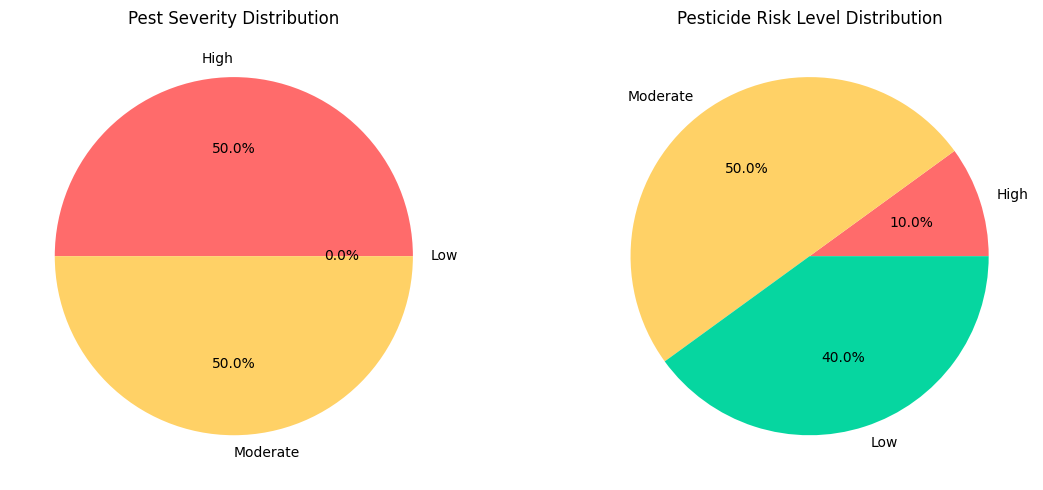

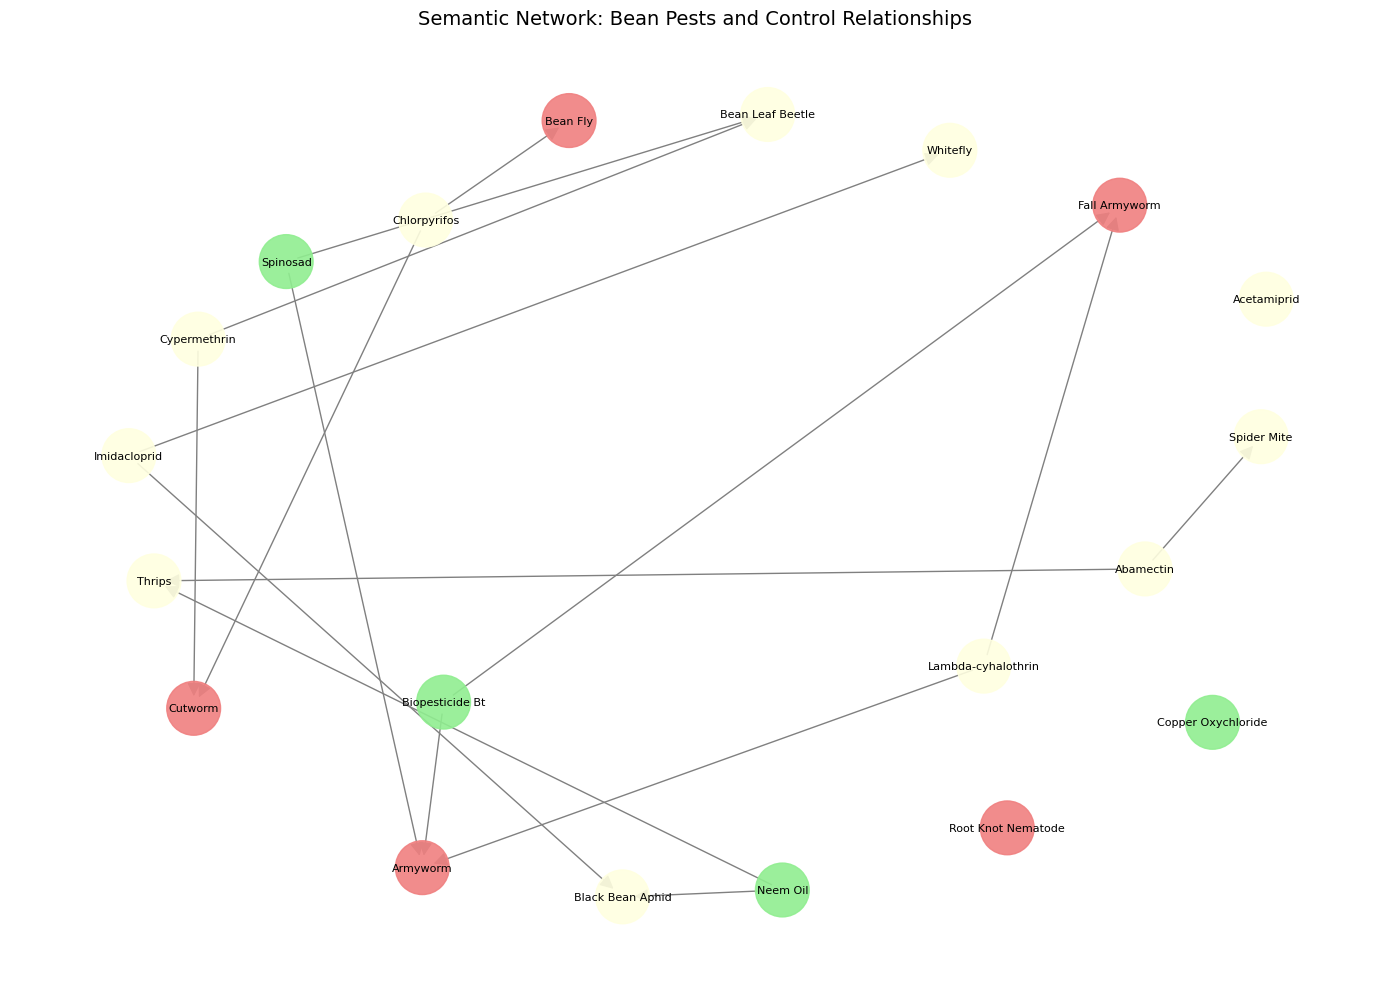

In [9]:
advisor = run_demonstration()

# ## 7. Interactive User Interface

In [10]:
def interactive_session():
    """Run interactive user session"""
    advisor = BeanPestAdvisor()
    
    while True:
        print("\n" + "=" * 50)
        print("BEAN PEST MANAGEMENT ADVISOR")
        print("=" * 50)
        print("1. Diagnose pests from symptoms")
        print("2. View knowledge base summary")
        print("3. Run demonstration scenarios") 
        print("4. Exit")
        
        choice = input("\nChoose option (1-4): ").strip()
        
        if choice == '1':
            advisor.interactive_diagnosis()
        elif choice == '2':
            advisor.display_knowledge_summary()
        elif choice == '3':
            run_demonstration()
        elif choice == '4':
            print("Thank you for using the Bean Pest Management Advisor!")
            break
        else:
            print("Invalid option. Please try again.")


# Run interactive session

In [11]:
interactive_session()


BEAN PEST MANAGEMENT ADVISOR
1. Diagnose pests from symptoms
2. View knowledge base summary
3. Run demonstration scenarios
4. Exit

=== BEAN PEST DIAGNOSIS ===
Available symptoms:
  1. Leaf Curling
  2. Yellowing
  3. Sticky Honeydew
  4. Stem Swelling
  5. Wilting
  6. Seedling Death
  7. Leaf Holes
  8. Defoliation
  9. Sooty Mould
  10. Leaf Yellowing
  11. Root Galls
  12. Stunted Growth
  13. Nutrient Deficiency
  14. Cut Seedlings
  15. Stem Cutting
  16. Silvering Of Leaves
  17. Flower Deformation
  18. Skeletonized Leaves
  19. Leaf Stippling
  20. Webbing
  21. Leaf Tunnels
  22. Ragged Leaves

Enter symptom numbers (comma-separated) or describe symptoms:

Diagnosing from symptoms: ['Leaf Curling', 'Leaf Holes', 'Leaf Yellowing', 'Leaf Stippling', 'Leaf Tunnels']

🎯 DIAGNOSIS RESULTS:
🔴 Fall Armyworm (Confidence: 50%)
   Symptoms: Leaf Tunnels, Ragged Leaves
🟡 Black Bean Aphid (Confidence: 33%)
   Symptoms: Leaf Curling, Yellowing, Sticky Honeydew
🟡 Bean Leaf Beetle (Confide

# ## 8. Advanced Query Examples

In [12]:
def demonstrate_advanced_queries():
    """Demonstrate advanced knowledge base queries"""
    kb = BeanPestKnowledgeBase()
    logic = BeanPestLogic(kb)
    
    print("=== ADVANCED KNOWLEDGE BASE QUERIES ===")
    
    # Query 1: Find all pests controllable by low-risk pesticides
    print("\n1. Pests with Low-Risk Control Options:")
    low_risk_controlled = set()
    for pesticide in kb.pesticides.values():
        if pesticide.risk_level == RiskLevel.LOW:
            low_risk_controlled.update(pesticide.target_pests)
    
    for pest_id in low_risk_controlled:
        pest = kb.pests[pest_id]
        print(f"   • {pest.name} (Severity: {pest.severity.value})")
    
    # Query 2: Find pesticides with zero pre-harvest interval
    print("\n2. Zero Pre-Harvest Interval Pesticides:")
    for pesticide in kb.pesticides.values():
        if pesticide.pre_harvest_interval == 0:
            print(f"   • {pesticide.name} ({pesticide.control_type.value})")
    
    # Query 3: High severity pests with multiple control options
    print("\n3. High Severity Pests with Multiple Controls:")
    for pest_id, pest in kb.pests.items():
        if pest.severity == Severity.HIGH:
            controls = []
            for pesticide in kb.pesticides.values():
                if pest_id in pesticide.target_pests:
                    controls.append(pesticide.name)
            if len(controls) >= 2:
                print(f"   • {pest.name}: {', '.join(controls)}")
    
    # Query 4: Environmental risk analysis
    print("\n4. Environmental Risk Analysis:")
    high_risk_count = sum(1 for p in kb.pesticides.values() if p.risk_level == RiskLevel.HIGH)
    low_risk_count = sum(1 for p in kb.pesticides.values() if p.risk_level == RiskLevel.LOW)
    print(f"   High-risk pesticides: {high_risk_count}")
    print(f"   Low-risk pesticides: {low_risk_count}")
    print(f"   Safety ratio: {low_risk_count/(len(kb.pesticides)):.1%} low-risk options")


# Run advanced queries

In [13]:
demonstrate_advanced_queries()

=== ADVANCED KNOWLEDGE BASE QUERIES ===

1. Pests with Low-Risk Control Options:
   • Thrips (Severity: Moderate)
   • Black Bean Aphid (Severity: Moderate)
   • Fall Armyworm (Severity: High)
   • Armyworm (Severity: High)
   • Bean Leaf Beetle (Severity: Moderate)

2. Zero Pre-Harvest Interval Pesticides:
   • Biopesticide Bt (Biological)
   • Neem Oil (Botanical)

3. High Severity Pests with Multiple Controls:
   • Cutworm: Cypermethrin, Chlorpyrifos
   • Armyworm: Lambda-cyhalothrin, Biopesticide Bt, Spinosad
   • Fall Armyworm: Lambda-cyhalothrin, Biopesticide Bt

4. Environmental Risk Analysis:
   High-risk pesticides: 1
   Low-risk pesticides: 4
   Safety ratio: 40.0% low-risk options


# ## 9. System Evaluation

In [14]:
def evaluate_system():
    """Evaluate system completeness and coverage"""
    kb = BeanPestKnowledgeBase()
    
    print("=== SYSTEM EVALUATION ===")
    
    # Coverage analysis
    total_possible_controls = len(kb.pests) * len(kb.pesticides)
    actual_controls = 0
    for pesticide in kb.pesticides.values():
        actual_controls += len(pesticide.target_pests)
    
    coverage = actual_controls / total_possible_controls
    print(f"Knowledge Base Coverage: {coverage:.2%}")
    
    # Symptom coverage
    symptoms_per_pest = [len(pest.symptoms) for pest in kb.pests.values()]
    avg_symptoms = sum(symptoms_per_pest) / len(symptoms_per_pest)
    print(f"Average symptoms per pest: {avg_symptoms:.1f}")
    
    # Risk distribution
    risk_levels = {}
    for pesticide in kb.pesticides.values():
        risk = pesticide.risk_level.value
        risk_levels[risk] = risk_levels.get(risk, 0) + 1
    
    print("\nPesticide Risk Distribution:")
    for risk, count in risk_levels.items():
        percentage = count / len(kb.pesticides) * 100
        print(f"  {risk}: {count} pesticides ({percentage:.1f}%)")
    
    # Control type analysis
    control_types = {}
    for pesticide in kb.pesticides.values():
        ctype = pesticide.control_type.value
        control_types[ctype] = control_types.get(ctype, 0) + 1
    
    print("\nControl Type Distribution:")
    for ctype, count in control_types.items():
        print(f"  {ctype}: {count} products")

# Run system evaluation

In [15]:
evaluate_system()

=== SYSTEM EVALUATION ===
Knowledge Base Coverage: 16.00%
Average symptoms per pest: 2.3

Pesticide Risk Distribution:
  Moderate: 5 pesticides (50.0%)
  High: 1 pesticides (10.0%)
  Low: 4 pesticides (40.0%)

Control Type Distribution:
  Chemical: 7 products
  Biological: 2 products
  Botanical: 1 products


# ## 10. Assignment Summary
# 
# **Knowledge Representation Achievements:**
# 
# 1. **Formal Ontology** - Complete class hierarchy for pests and pesticides
# 2. **First-Order Logic Implementation** - All Prolog rules translated to Python
# 3. **Semantic Network** - Visual representation of pest-control relationships
# 4. **Rule-Based Reasoning** - Symptom diagnosis and safe-first recommendations
# 
# **Key Prolog Rules Implemented:**
# - `causes/2` → Symptom-based diagnosis
# - `controls/2` → Pesticide efficacy mapping  
# - `risk_level/2` → Environmental safety reasoning
# - `phi/2` → Harvest safety calculations
# - IPM strategy rules and resistance management
# 
# **System Features:**
# - Interactive pest diagnosis from symptoms
# - Risk-prioritized control recommendations
# - Environmental safety warnings
# - Resistance management guidance
# - Comprehensive knowledge base visualization
# 
# **Educational Value:**
# - Demonstrates practical KR&R application
# - Shows Prolog-to-Python translation
# - Provides real agricultural decision support
# - Implements sustainable pest management principles

In [16]:
print("✅ Bean Pest Management Knowledge Base System - READY FOR SUBMISSION!")
print("\nKey Statistics:")
kb = BeanPestKnowledgeBase()
print(f"• Pests: {len(kb.pests)}")
print(f"• Pesticides: {len(kb.pesticides)}") 
print(f"• Symptoms: {len(kb.symptoms_to_pests)}")
print(f"• Semantic Relationships: {kb.semantic_network.number_of_edges()}")
print(f"• FOL Rules Implemented: 5 core reasoning patterns")

✅ Bean Pest Management Knowledge Base System - READY FOR SUBMISSION!

Key Statistics:
• Pests: 10
• Pesticides: 10
• Symptoms: 22
• Semantic Relationships: 16
• FOL Rules Implemented: 5 core reasoning patterns
